In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
plt.style.use('seaborn-notebook')
import statsmodels.api as sm
%matplotlib inline
from scipy.stats import pearsonr

In [15]:
salary = pd.read_csv('dados/salary_data.csv')
print(salary.shape)
salary.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [16]:
# correlation or dependence
pearsonr(salary['YearsExperience'], salary['Salary'])
#correlation next to 1 : Perfect
#p-value next to 0: Nice

(0.9782416184887599, 1.1430681092271564e-20)

Text(0.5, 1.0, 'Scatter Chart')

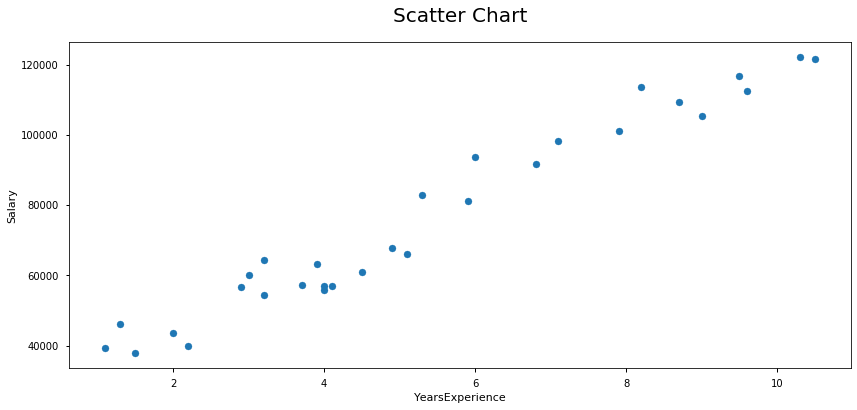

In [17]:
# graphic: Seeking data linearity
plt.figure(figsize = (14,6))

plt.scatter(salary['YearsExperience'], salary['Salary'])
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.title('Scatter Chart', fontdict = {'fontsize': 20}, pad = 20)

# Division data test and data model

In [18]:
from sklearn.model_selection import train_test_split

In [46]:
X = salary['YearsExperience']
y = salary['Salary']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101) # retorna tupla de 4 elementos

In [29]:
x_mean = x_train.mean()
y_mean = y_train.mean()

#### Determination of LinearRegression coefficients:

In [37]:
def LinearCoef(x_train, y_train):
    beta_1 = sum( (x_train - x_train.mean()) * (y_train - y_train.mean()) ) / sum( (x_train - x_train.mean()) ** 2 )
    beta_0 = y_train.mean() - x_train.mean() * beta_1
    return beta_1, beta_0

In [40]:
beta_1, beta_0 = LinearCoef(x_train, y_train)
print('beta_1:', beta_1, '\nbeta_0:', beta_0)

beta_1: 9577.171749746614 
beta_0: 25975.81465954113


Text(0.5, 1.0, 'Regression Chart')

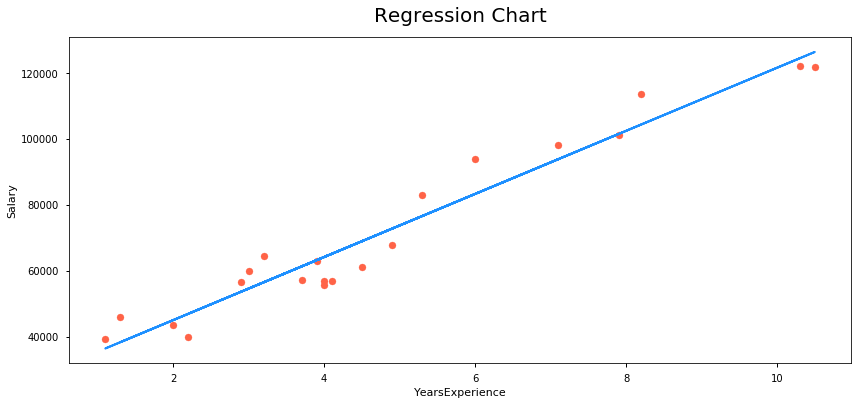

In [49]:
plt.figure(figsize = (14,6))

#gráfico de dispersão
plt.scatter(x_train, y_train, color = 'tomato')

#reta ajustada ao modelo
plt.plot(x_train, beta_0 + beta_1 * x_train, color = 'dodgerblue', linewidth = 2)

plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.title('Regression Chart', fontdict = {'fontsize': 20}, pad = 15)

$$
\beta_0=\overline{y} + \beta_1 * \overline{y}
$$



### Métodos para avaliação da Modelagem

#### Ser não correlacionados:

Text(0.5, 1.0, 'Dispersion Error')

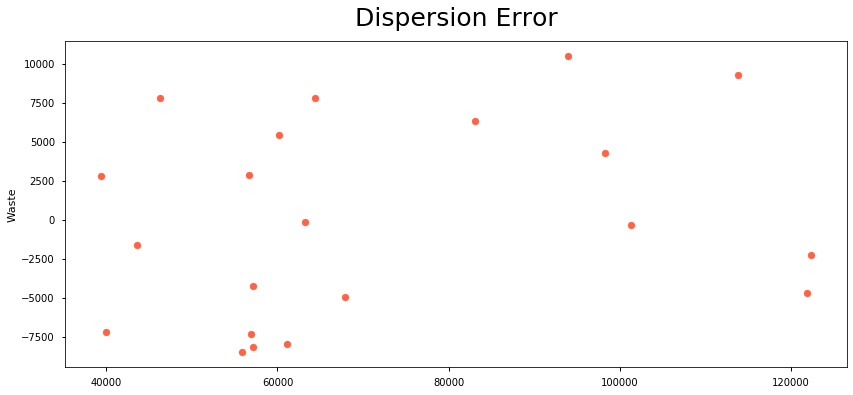

In [51]:
plt.figure(figsize = (14,6))
plt.scatter(y_train, y_train - (beta_0 + beta_1 * x_train), color='tomato')
plt.ylabel('Waste')
plt.title('Dispersion Error', fontdict = {'fontsize': 25}, pad = 15)

#### Mean = 0:

In [52]:
soma_erros = (y_train - (beta_0 + beta_1 * x_train)).sum()
soma_erros

1.8189894035458565e-10

#### Gaussian Dispersion of Errors:

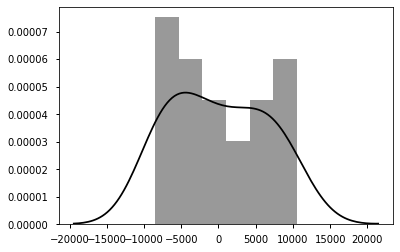

In [53]:
sns.distplot(y_train - (beta_0 + beta_1 * x_train), bins = 'auto', color='black', rug   = False)

### Métricas para análise de resíduos:

## Métricas para Análise dos Erros

$$
SQE = \frac{1}{N} \sum_{i=1}^N \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - \hat{y}_i\right]^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - (\beta_0 + \beta_1x_i)\right]^2
$$

$$
SQR = \frac{1}{N} \sum_{i=1}^N \left(\hat{y}_i - \overline{y}\right)^2
$$

$$
SQT = \frac{1}{N} \sum_{i=1}^N \left(y_i - \overline{y}\right)^2
$$

### 1. R-Quadrado ($R^2$)

$$
R^2 = 1 - \frac{SQE}{SQT} = \frac{SQT - SQE}{SQT} = \frac{SQR}{SQT}
$$

In [55]:
def R2(y, y_est):
    SQE = sum((y - y_est)**2)
    SQT = sum((y - y.mean())**2)
    
    return 1 - (SQE  / SQT)

In [56]:
R2(y_train, beta_0 + beta_1 * x_train)

0.9430010023853349

### Erro Médio Absoluto (MAE)

In [57]:
def MAE(y, y_est):
    MAE = np.abs(y - y_est).mean()
    return round(MAE,2)

In [58]:
MAE(y_train, beta_0 + beta_1 * x_train)

5450.04

### Erro Médio Quadrático (MSE)

In [59]:
def MSE(y, y_est):
       return round(((y - y_est)**2).mean(),2)

In [62]:
MSE(y_train, beta_0 + beta_1 * x_train)

38203122.44

### Raiz do Erro Quadrático Médio (RMSE)


In [63]:
def RMSE (y, y_est):
    return np.sqrt(MSE(y, y_est))

In [64]:
RMSE(y_train, beta_0 + beta_1 * x_train)

6180.867450447388

### Raiz do Erro Logarítmico Quadrado Médio (RMSLE)



In [65]:
def RMSLE(y, y_est):
    logy = np.log( y + 1 )
    logy_est = np.log( y_est + 1 )
    diff = (logy - logy_est) ** 2
    return np.sqrt( diff.mean() )

In [66]:
RMSLE(y_train, beta_0 + beta_1 * x_train)

0.0989459933116198

### Scikit Learning

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
X = np.array(x_train)

In [69]:
Y = np.array(y_train)

In [70]:
lr = LinearRegression().fit(X.reshape(-1, 1), Y)

In [71]:
# determination of coefficients:
#Regression slope coefficients (Angular)
lr.coef_

array([9577.17174975])

In [72]:
#intercept
lr.intercept_

25975.814659541138

In [73]:
# Correlation
lr.score(X.reshape(-1, 1), Y) 

0.9430010023853349

### Model validation

In [79]:
y_pred = lr.predict(np.array(x_test).reshape(-1, 1))

In [80]:
y_test.shape

(9,)

In [81]:
y_pred.shape

(9,)

In [91]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

Text(0.5, 1.0, 'Regression Chart')

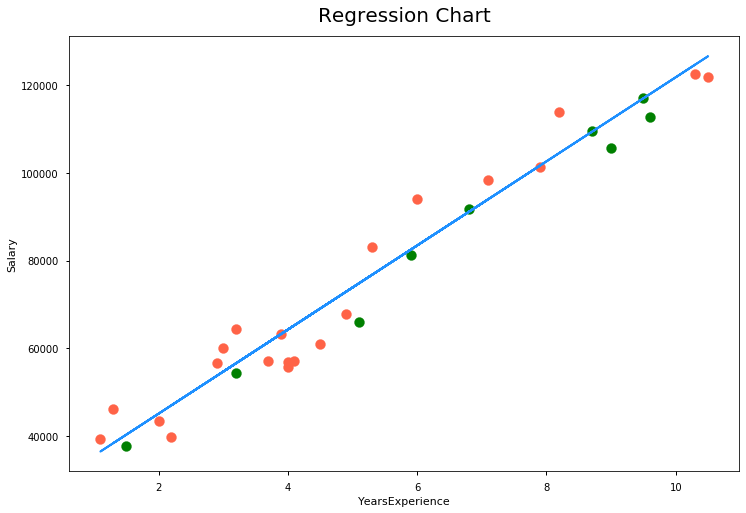

In [93]:
plt.figure(figsize = (12,8))

plt.scatter(x_train, y_train, color = 'tomato', s= 100)
plt.scatter(x_test, y_test, color = 'g', s= 100)

#reta ajustada ao modelo
plt.plot(x_train, beta_0 + beta_1 * x_train, color = 'dodgerblue', linewidth = 2)

plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.title('Regression Chart', fontdict = {'fontsize': 20}, pad = 15)

In [83]:
print('R² =', r2_score(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MSE =', mean_squared_error(y_test, y_pred))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSLE =', np.sqrt(mean_squared_log_error(y_test, y_pred)))

R² = 0.9746363787521536
MAE = 3038.6823612518824
MSE = 17978409.49734413
RMSE = 4240.095458517901
RMSLE = 0.05541179047435233


### Avaliação do modelo

**Q2) O arquivo `usa_housing.csv` consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:**

* `Avg. Area Income`: Média da renda dos residentes de onde a casa está localizada.
* `Avg. Area House Age`: Média de idade das casas da mesma cidade.
* `Avg. Area Number of Rooms`: Número médio de quartos para casas na mesma cidade.
* `Avg. Area Number of Bedrooms`: Número médio de quartos para casas na mesma cidade.
* `Area Population`: A população da cidade onde a casa está localizada.
* `Price`: Preço de venda da casa.
* `Address`: Endereço da casa.

**Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.**

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/7cf57d48-ac3d-4748-9d81-5b4d6677fcff.csv) para fazer o download do dataset.

In [99]:
house = pd.read_csv('dados/usa_housing.csv')

In [100]:
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


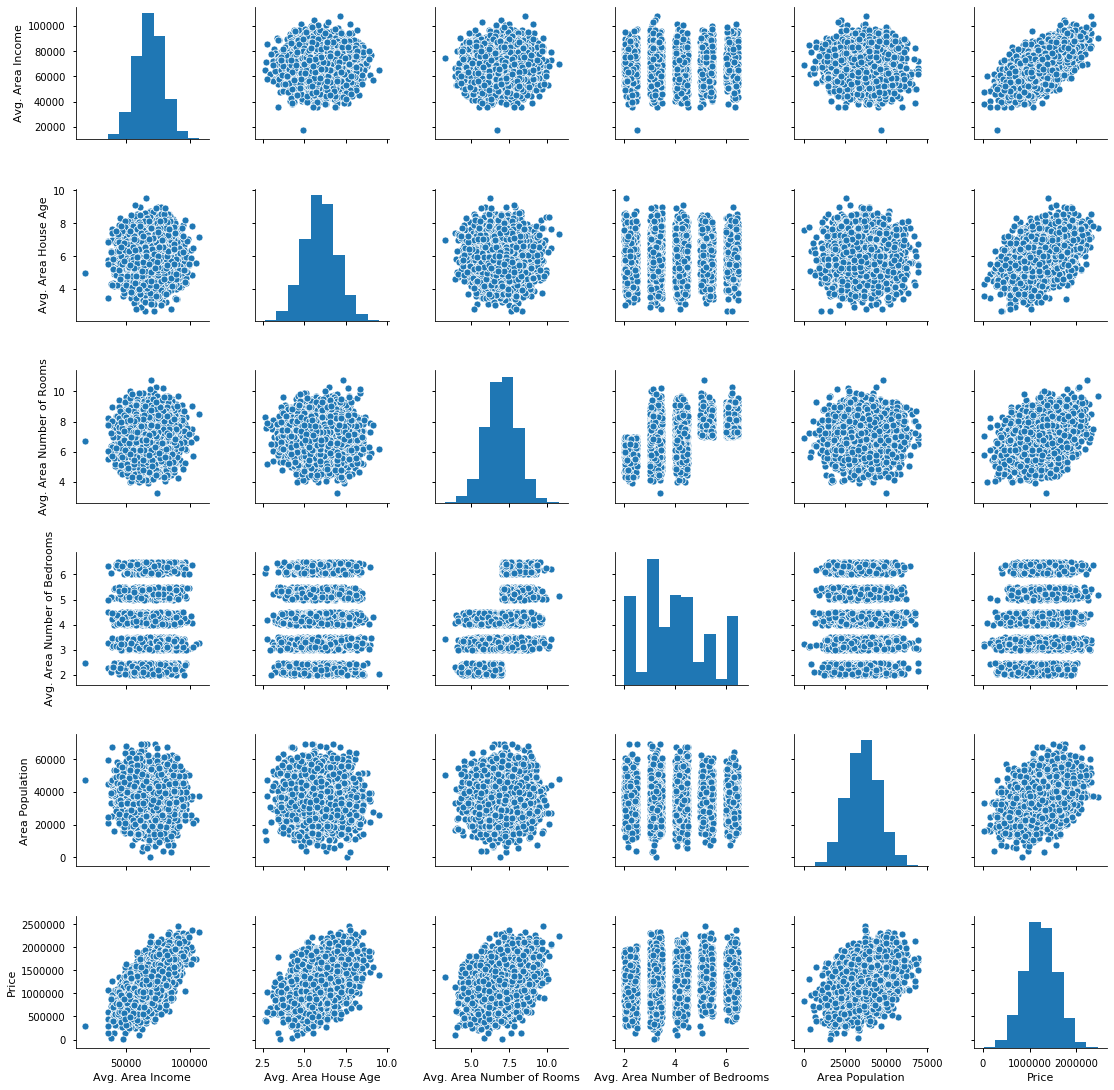

In [101]:
sns.pairplot(house)

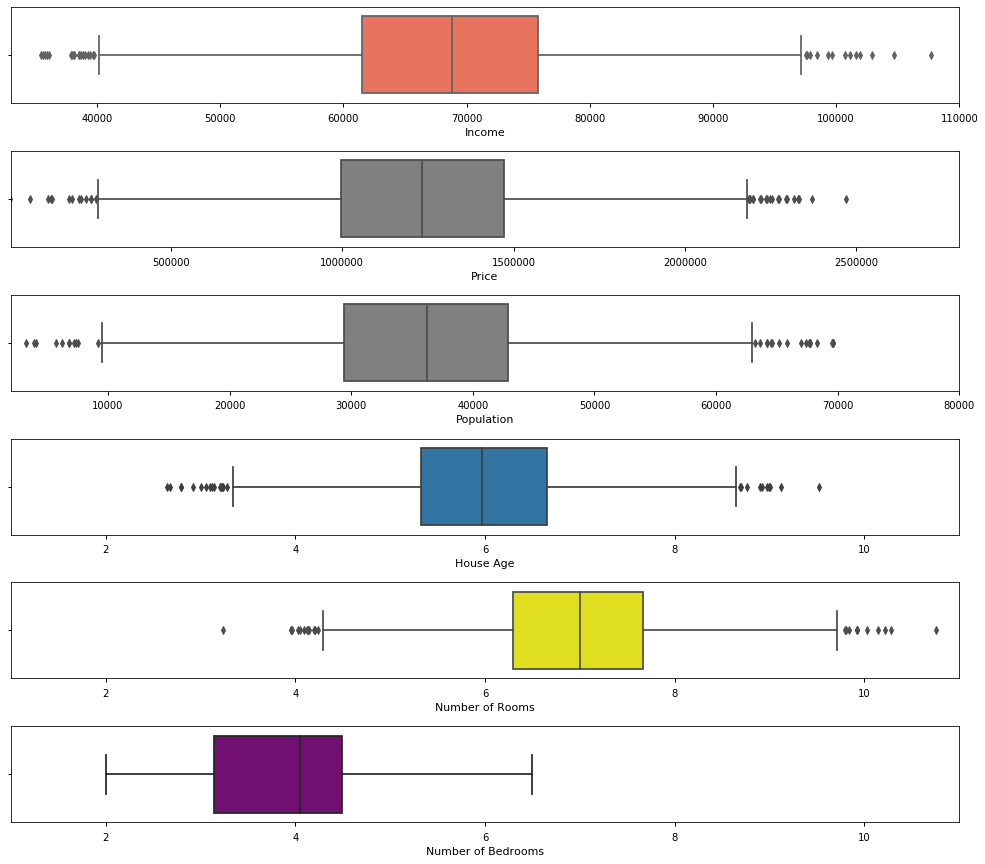

In [66]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(17, 15))
# looking for outliers
fig.subplots_adjust(hspace=0.5)


sns.boxplot(house['Avg. Area Income'], ax=ax1, color='tomato')
ax1.set_xlim(33000, 110000)
ax1.set_xlabel('Income')

sns.boxplot(house['Price'], ax=ax2, color = 'gray')
ax2.set_xlim(33000, 2800000)
ax2.set_xlabel('Price')

sns.boxplot(house['Area Population'], ax=ax3, color = 'gray')
ax3.set_xlim(2000, 80000)
ax3.set_xlabel('Population')

sns.boxplot(house['Avg. Area House Age'], ax=ax4)
ax4.set_xlim(1, 11)
ax4.set_xlabel('House Age')

sns.boxplot(house['Avg. Area Number of Rooms'], ax=ax5, color = 'yellow')
ax5.set_xlim(1, 11)
ax5.set_xlabel('Number of Rooms')

sns.boxplot(house['Avg. Area Number of Bedrooms'], ax=ax6, color = 'purple')
ax6.set_xlim(1, 11)
ax6.set_xlabel('Number of Bedrooms')

plt.show()

## Removing OutLiers

In [96]:
1400/3

466.6666666666667

In [97]:
1200/2

600.0